In [8]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import dask.dataframe as dd
import numpy as np
import tensorflow as tf
import seaborn as sns



In [9]:

# Read the CSV file into a DataFrame
df = pd.read_csv('Resources/1.1predicted_labels.csv')

# Display the first few rows of the DataFrame
print(df.head(250))


     Predicted_Label
0                  1
1                  0
2                  0
3                  0
4                  0
..               ...
245                0
246                0
247                1
248                0
249                0

[250 rows x 1 columns]


In [10]:
# Check for duplicate column names
if df.columns.duplicated().any():
    print("Duplicate columns found!")
    # Rename or drop duplicates
    df = df.loc[:, ~df.columns.duplicated()]

# Now, try to create the DataFrame with the 'Predicted_Label' column
if 'Predicted_Label' in df.columns:
    predicted_labels_df = pd.DataFrame(df, columns=['Predicted_Label'])
else:
    print("Column 'Predicted_Label' not found! Check column names.")

# Display the new DataFrame
print(predicted_labels_df.head(250))


     Predicted_Label
0                  1
1                  0
2                  0
3                  0
4                  0
..               ...
245                0
246                0
247                1
248                0
249                0

[250 rows x 1 columns]


In [11]:
# Extract the 'Predicted_Label' column from the DataFrame 'df_predictions' and convert it into a NumPy array
predicted_labels_array = df['Predicted_Label'].values

# Display the NumPy array with predicted labels
predicted_labels_array


array([1, 0, 0, ..., 1, 1, 0])

In [12]:
import numpy as np

# Assuming predicted_labels_array is a NumPy array
unique_values = np.unique(predicted_labels_array)

# Print the unique values
print(unique_values)


[0 1]


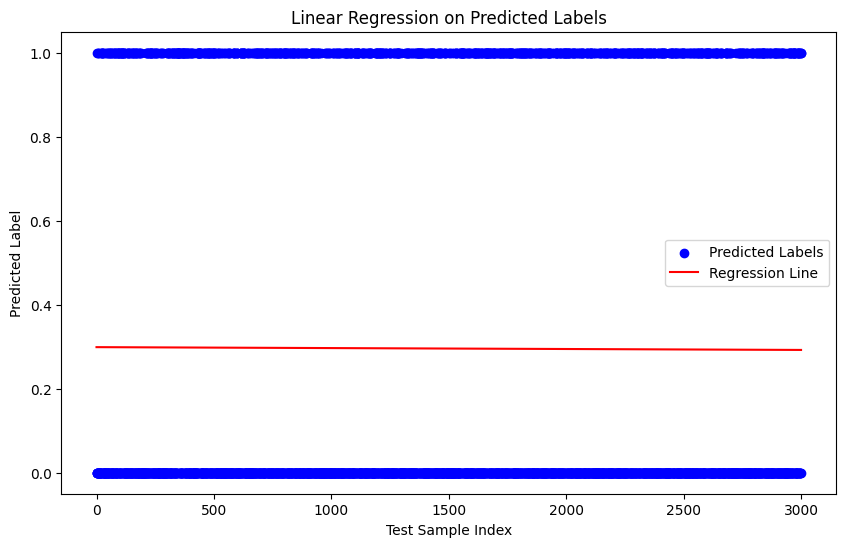

In [13]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming df_predictions has the predicted labels in 'Predicted_Label'

# Reshape the data for linear regression (X needs to be 2D, y is 1D)
X = df.index.values.reshape(-1, 1)  # Use the index (sample number) as X
y = df['Predicted_Label'].values  # Use the predicted labels as y

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the values based on the regression model
y_pred = model.predict(X)

# Plot the original data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='b', label='Predicted Labels')  # Plot the original data points
plt.plot(X, y_pred, color='r', label='Regression Line')  # Plot the regression line

# Customize the plot
plt.xlabel('Test Sample Index')
plt.ylabel('Predicted Label')
plt.title('Linear Regression on Predicted Labels')
plt.legend()

# Show the plot
plt.show()


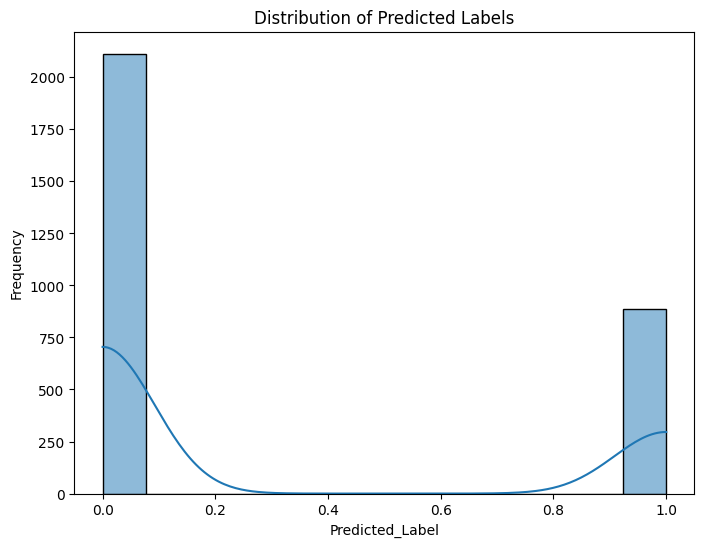

In [14]:
# Example: Histogram of the 'Predicted_Label' column
plt.figure(figsize=(8, 6))
sns.histplot(df['Predicted_Label'], kde=True)  # kde=True adds a kernel density estimate
plt.title("Distribution of Predicted Labels")
plt.xlabel("Predicted_Label")
plt.ylabel("Frequency")
plt.show()


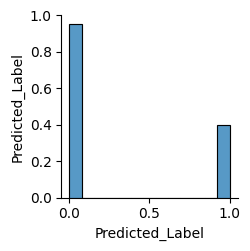

In [16]:
# Example: Pair plot to see relationships between all numeric features
sns.pairplot(df)
plt.show()


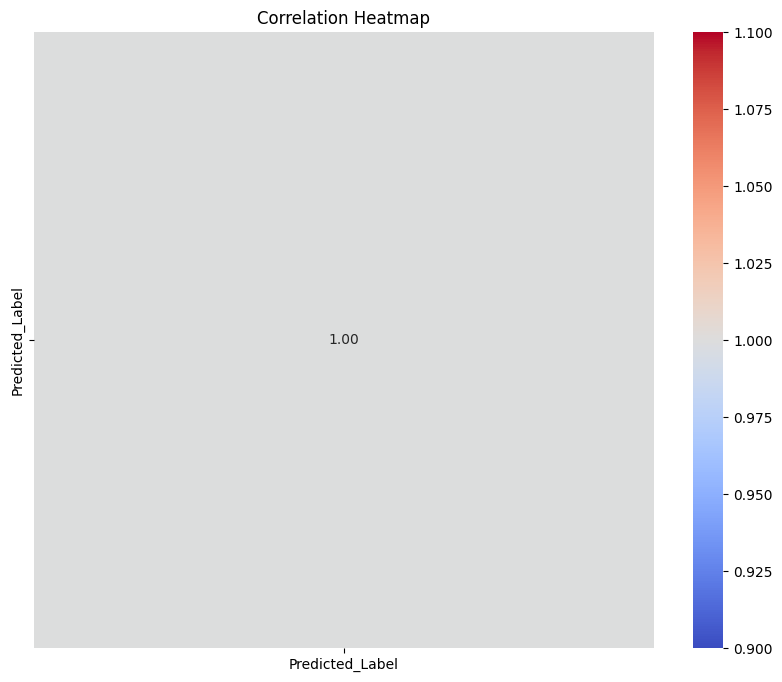

In [17]:
# Example: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


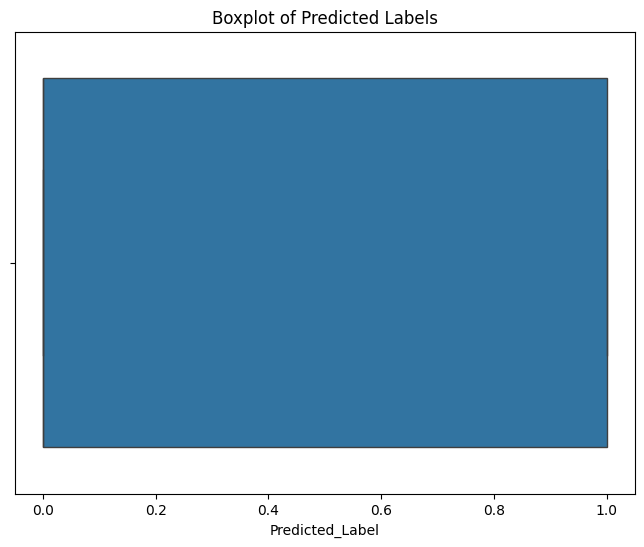

In [18]:
# Example: Boxplot of the 'Predicted_Label' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Predicted_Label'])
plt.title("Boxplot of Predicted Labels")
plt.xlabel("Predicted_Label")
plt.show()


In [22]:
import seaborn as sns
# Read the CSV file into a DataFrame
df_predictions = pd.read_csv("Resources/3.0df_predictions.csv")
df_predictions

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Predicted_Label
0,-1.581332,-1.145345,-1.077447,-0.542801,0.305765,0.305765,2.148834,1
1,-0.830775,0.379667,0.538454,-0.198337,-0.314730,-0.314730,-0.624034,0
2,1.467443,-0.202029,0.407213,-0.616054,0.305765,0.305765,-0.624034,0
3,-0.927920,2.416086,2.152304,0.104281,-0.314730,-0.314730,-0.624034,0
4,-0.297059,0.372396,0.423618,0.506128,-0.624978,-0.624978,-0.624034,0
...,...,...,...,...,...,...,...,...
2995,0.504672,-0.373629,-0.140306,1.961414,-0.624978,-0.624978,-0.624034,0
2996,-0.620874,-1.226298,-1.177928,-0.204852,0.305765,0.305765,2.148834,1
2997,0.977384,-1.015918,-0.860079,-0.582225,0.616013,0.616013,0.762400,1
2998,-0.293300,-0.884067,-0.901092,-0.433464,-0.314730,-0.314730,0.762400,1


In [24]:
print(df_predictions.columns)


Index(['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4',
       'Feature_5', 'Feature_6', 'Predicted_Label'],
      dtype='object')


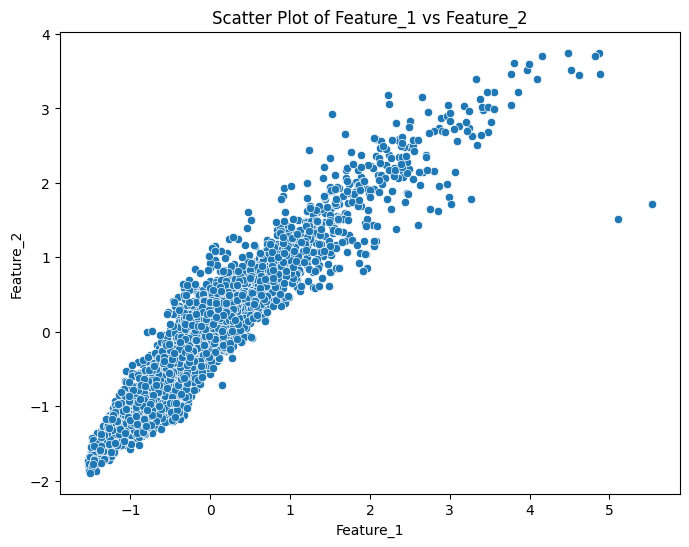

In [25]:

# Example: 'Scatter plot between two features (assuming 'Feature_1' and 'Feature_2' are columns in df_predictions)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature_1', y='Feature_2', data=df_predictions)
plt.title("Scatter Plot of Feature_1 vs Feature_2")
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.show()


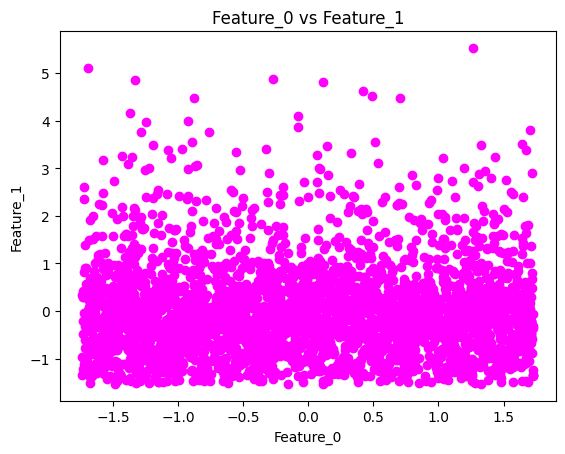

In [29]:
import matplotlib.pyplot as plt

# Scatter plot between Feature_0 and Feature_1 with customized colors
plt.scatter(df_predictions['Feature_0'], df_predictions['Feature_1'], color='magenta')  # Change color to magenta
plt.title("Feature_0 vs Feature_1")
plt.xlabel("Feature_0")
plt.ylabel("Feature_1")
plt.show()



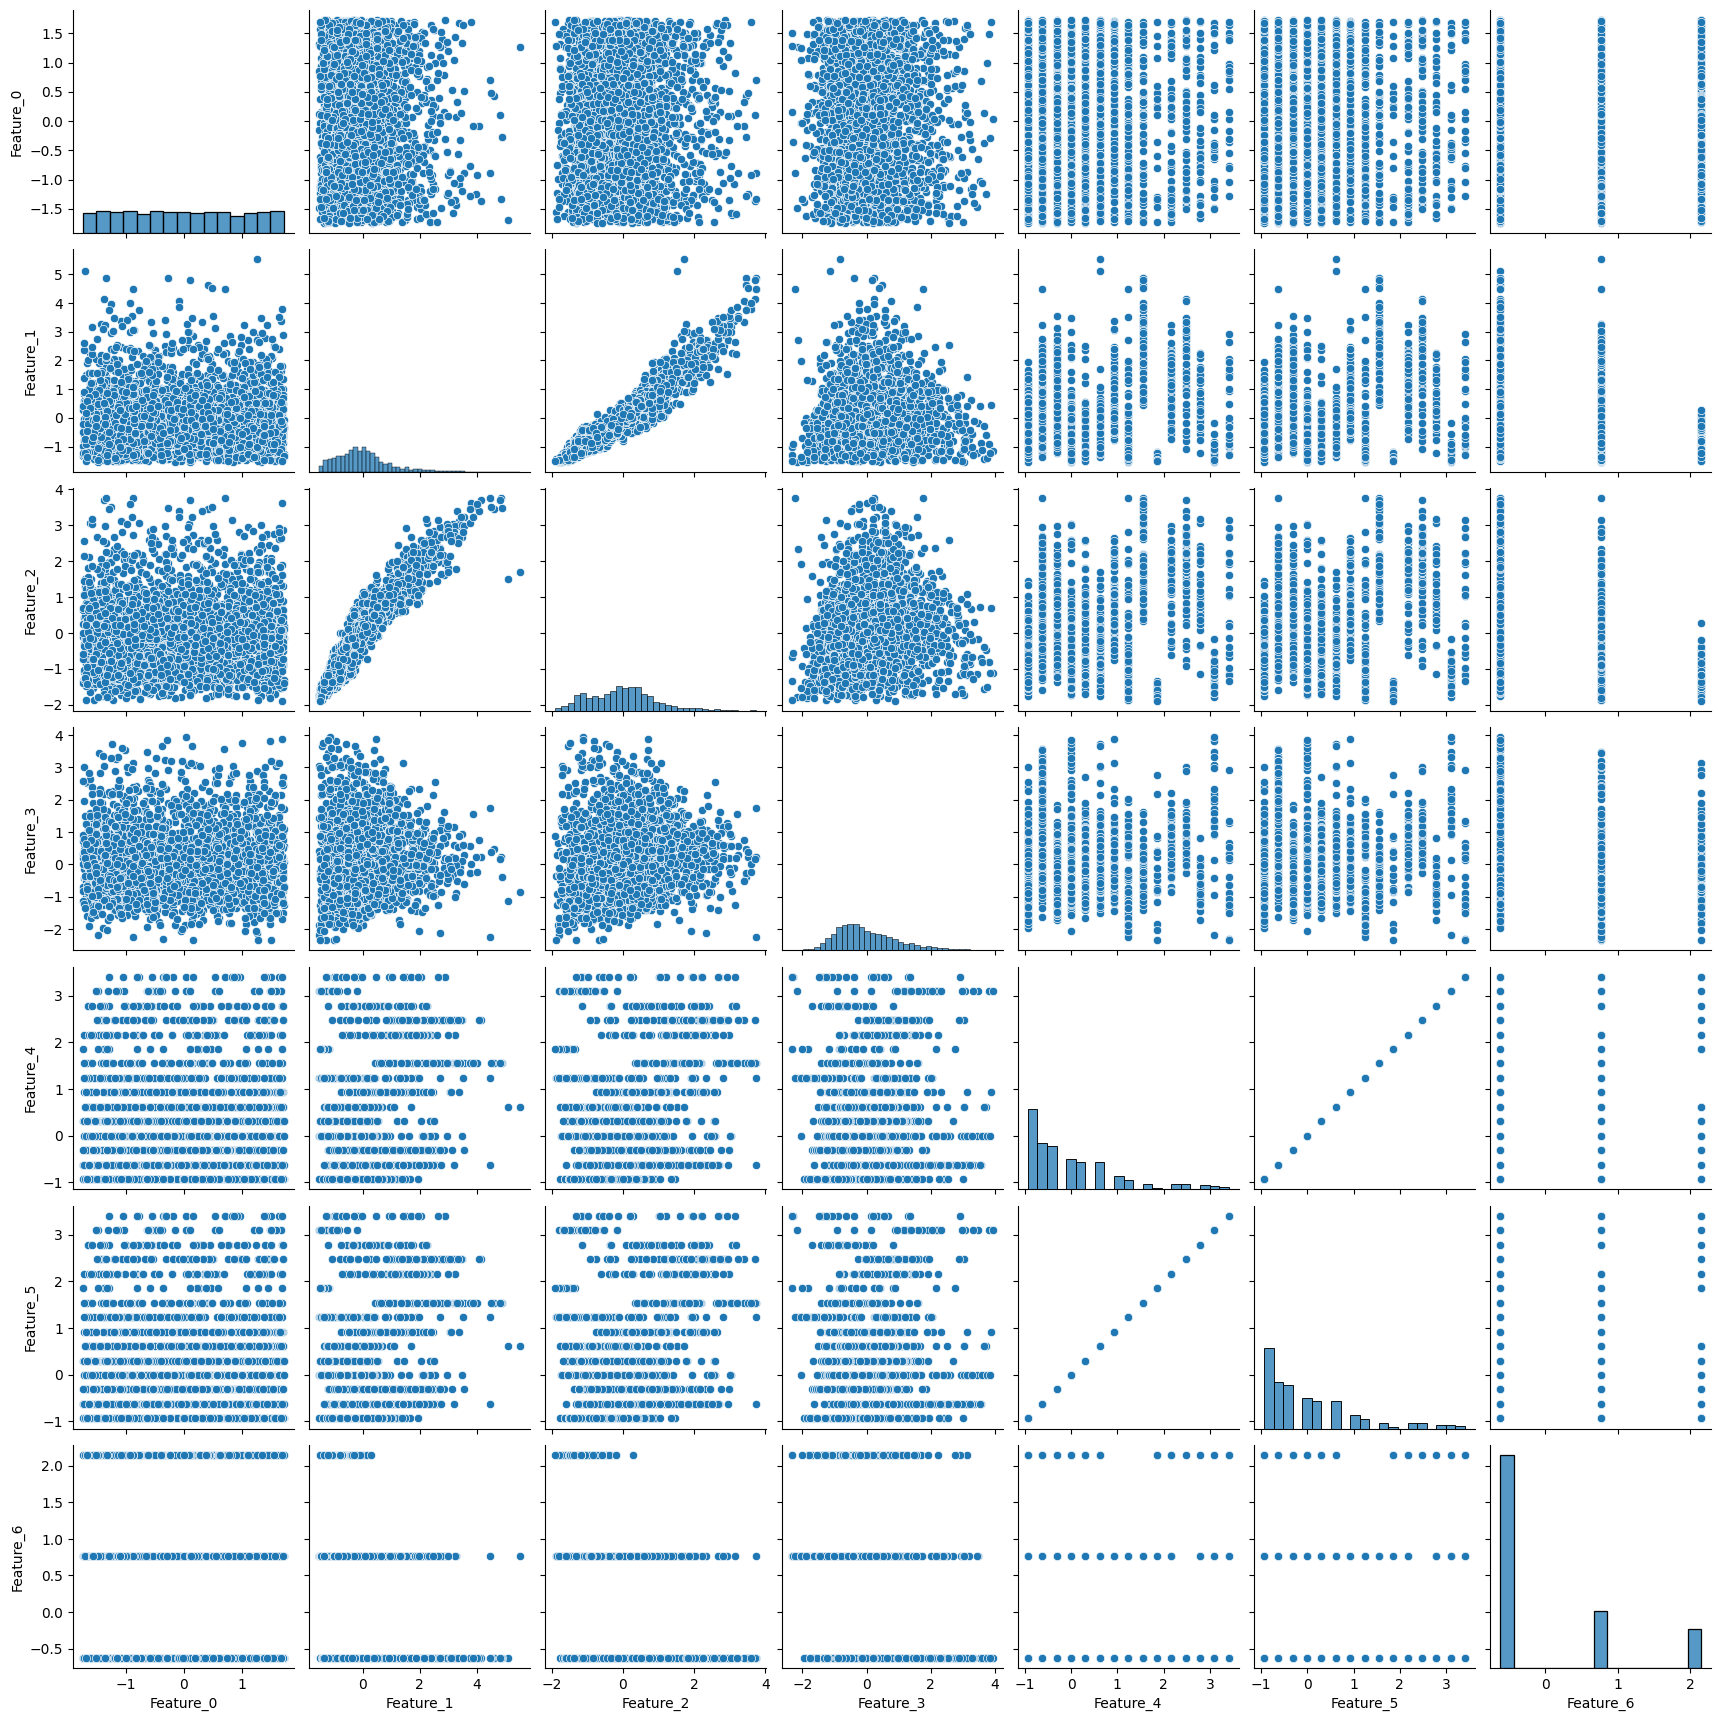

In [30]:
import seaborn as sns

sns.pairplot(df_predictions[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6']])
plt.show()


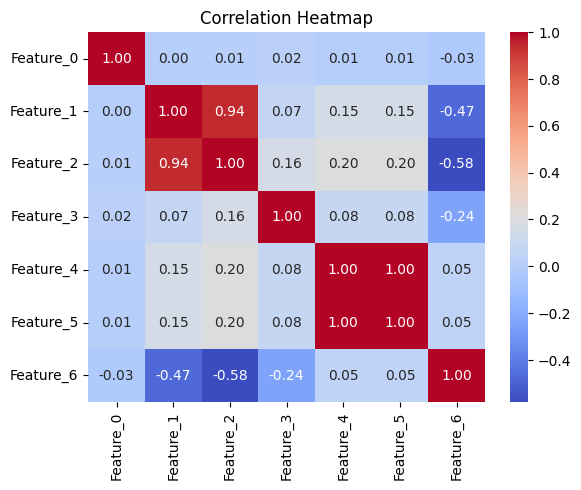

In [32]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df_predictions[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6']].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


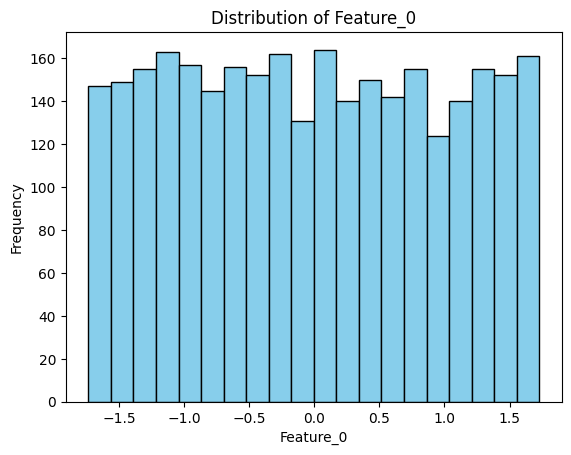

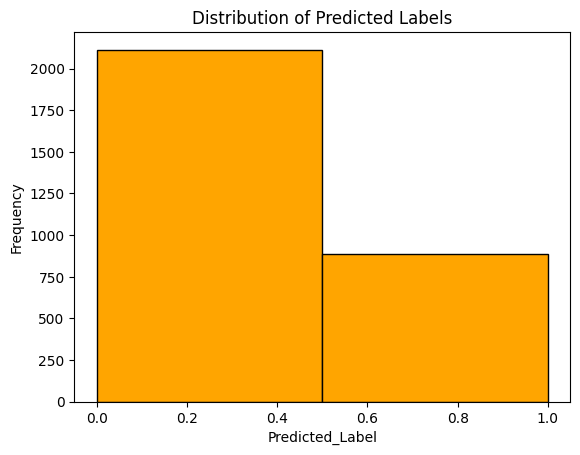

In [33]:
# Plot histogram for Feature_0
plt.hist(df_predictions['Feature_0'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Feature_0")
plt.xlabel("Feature_0")
plt.ylabel("Frequency")
plt.show()

# Plot histogram for Predicted_Label (if it's categorical)
plt.hist(df_predictions['Predicted_Label'], bins=2, color='orange', edgecolor='black')
plt.title("Distribution of Predicted Labels")
plt.xlabel("Predicted_Label")
plt.ylabel("Frequency")
plt.show()


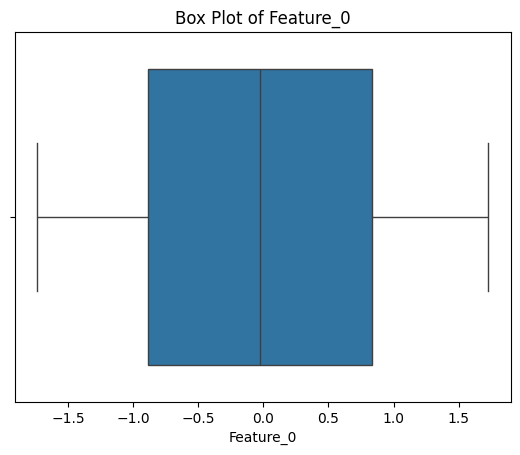

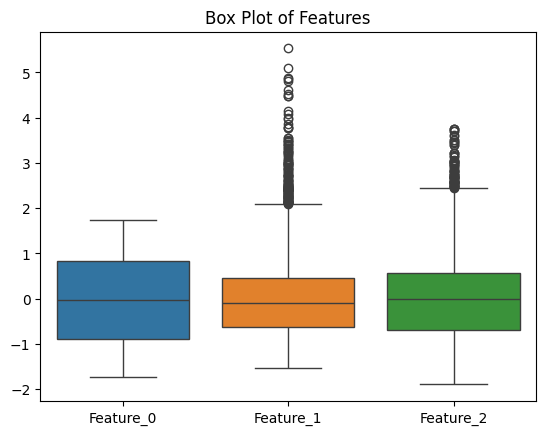

In [34]:
import seaborn as sns

# Box plot for Feature_0
sns.boxplot(x=df_predictions['Feature_0'])
plt.title("Box Plot of Feature_0")
plt.show()

# Box plot for multiple features
sns.boxplot(data=df_predictions[['Feature_0', 'Feature_1', 'Feature_2']])
plt.title("Box Plot of Features")
plt.show()


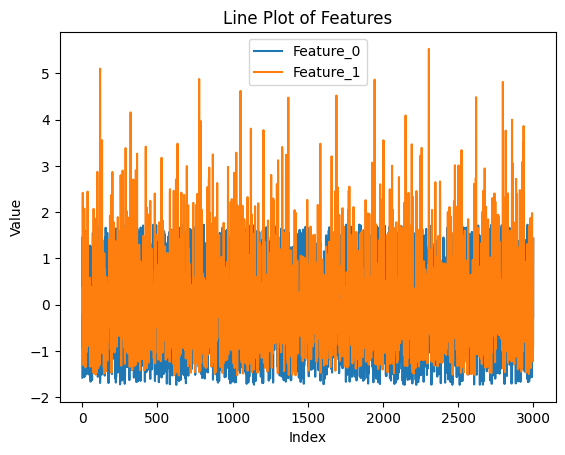

In [35]:
#line plot
plt.plot(df_predictions['Feature_0'], label='Feature_0')
plt.plot(df_predictions['Feature_1'], label='Feature_1')
plt.title("Line Plot of Features")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()


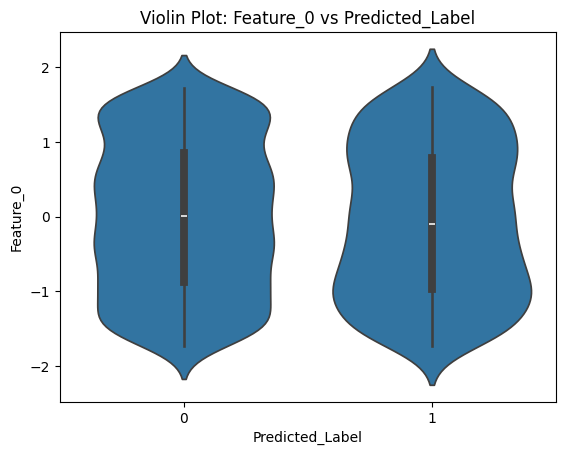

In [36]:
import seaborn as sns

sns.violinplot(x=df_predictions['Predicted_Label'], y=df_predictions['Feature_0'])
plt.title("Violin Plot: Feature_0 vs Predicted_Label")
plt.show()
